<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import missingno as mn
from scipy.stats import ttest_ind
import random
#filtering out deprecation and future warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [80]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/ages_dataset.csv')
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


*Dropping unnecessary columns*

In [81]:
df.drop(['Id', 'Short description', 'Associated Country Coordinates (Lat/Lon)'],\
          inplace=True, axis=1)

In [82]:
df.describe()

,Birth year,Death year,Age of death
count,1.223009e+06,1.223008e+06,1.223008e+06
mean,1.844972e+03,1.914246e+03,6.927406e+01
std,1.479390e+02,1.516898e+02,1.662938e+01
min,-2.700000e+03,-2.659000e+03,0.000000e+00
25%,1.828000e+03,1.895000e+03,6.000000e+01
50%,1.887000e+03,1.955000e+03,7.200000e+01
75%,1.918000e+03,1.994000e+03,8.100000e+01
max,2.016000e+03,2.021000e+03,1.690000e+02


In [83]:
df.isna().sum()

Name                                        0
Gender                                 133646
Country                                335509
Occupation                             206914
Birth year                                  0
Death year                                  1
Manner of death                       1169406
Age of death                                1
Associated Countries                   368693
Associated Country Life Expectancy     368930
dtype: int64

In [84]:
df.shape

(1223009, 10)

*Seeing how many values are present relatively in each column*

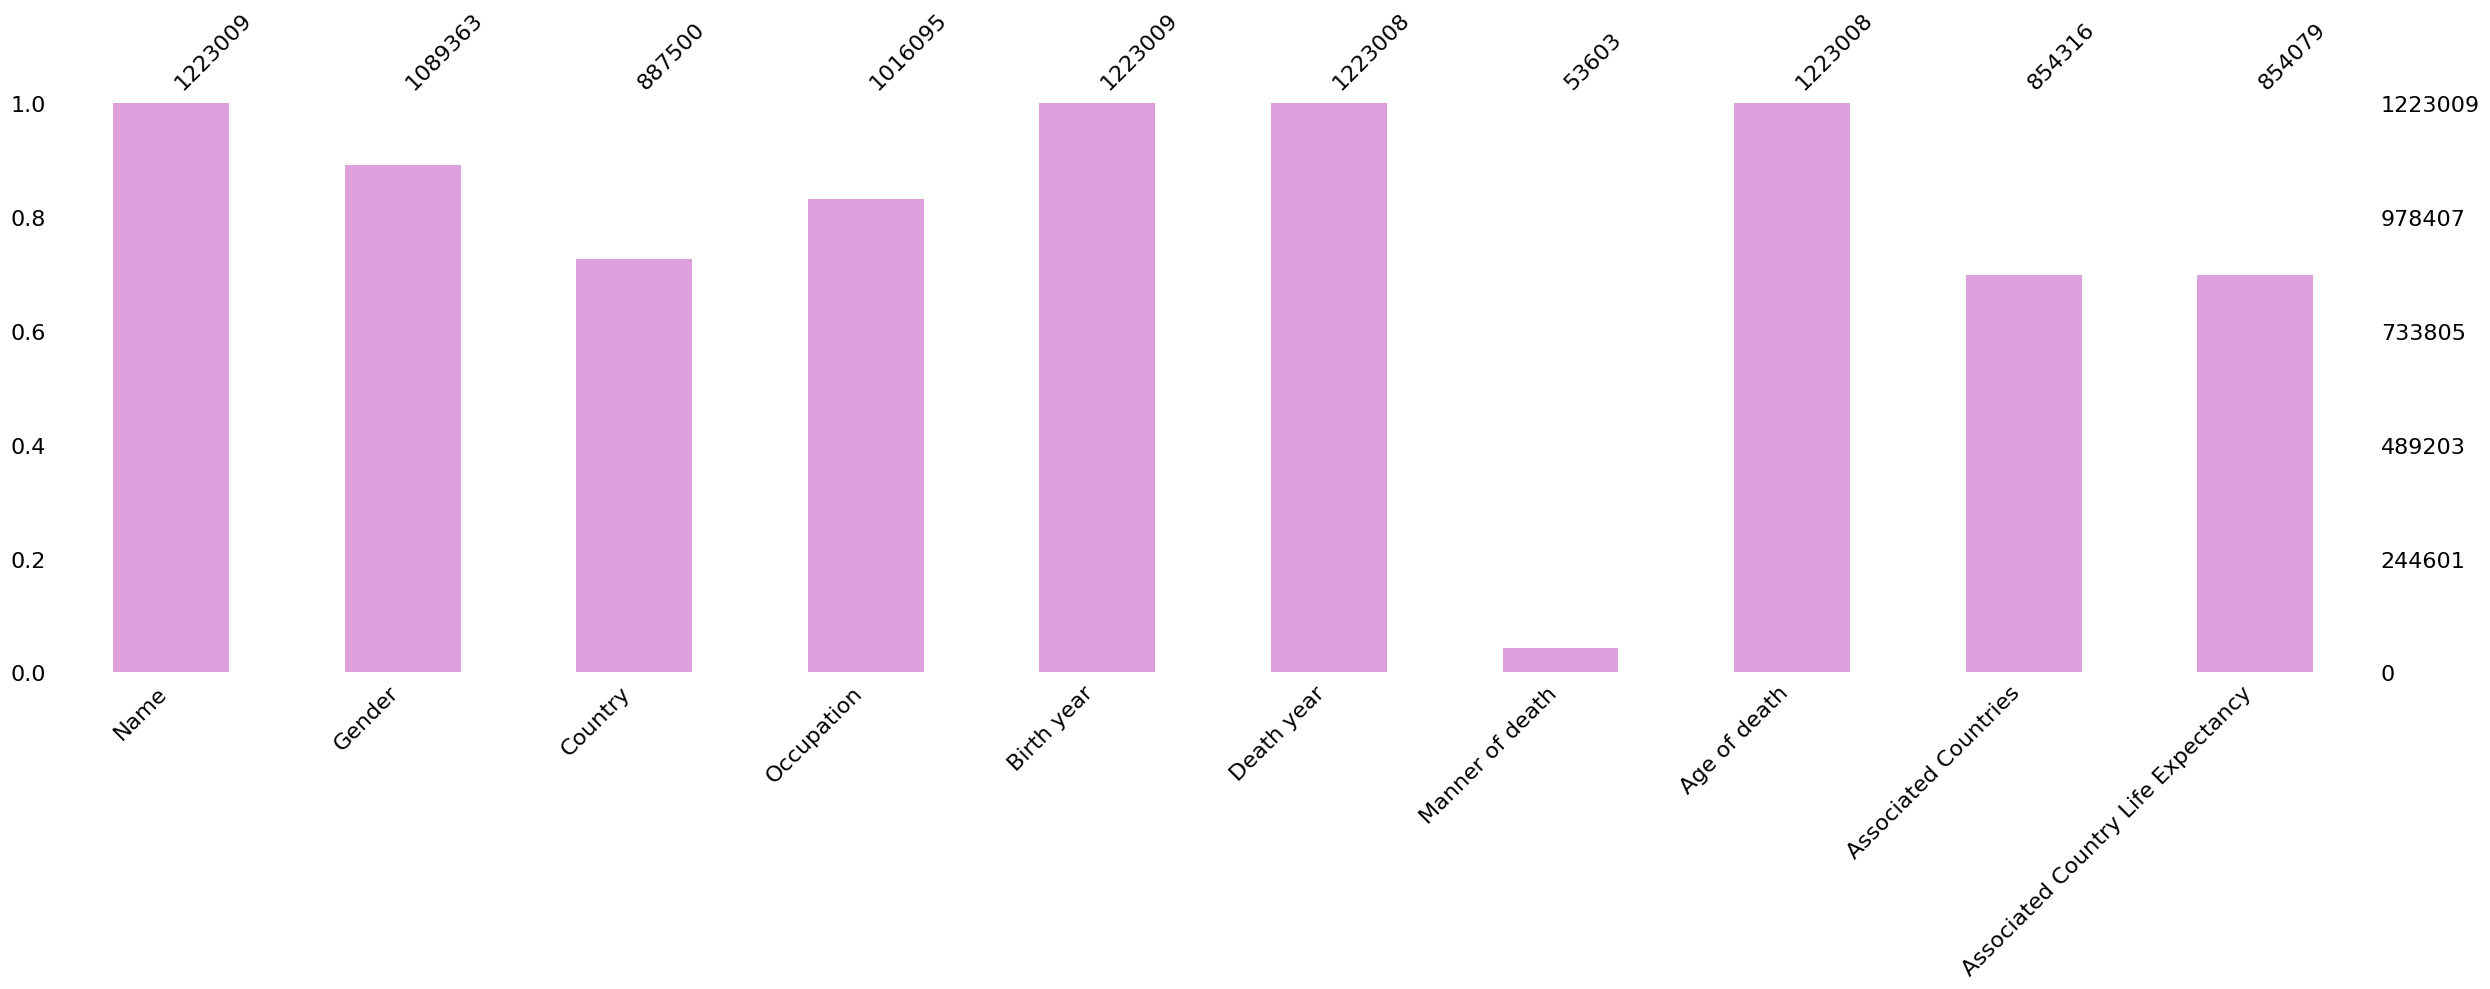

In [85]:
mn.bar(df, labels=True, color='plum')
pt.tight_layout()
pt.show()

In [86]:
df = df[df['Age of death'].isna()==False]

*Seeing how the age is distributed.*

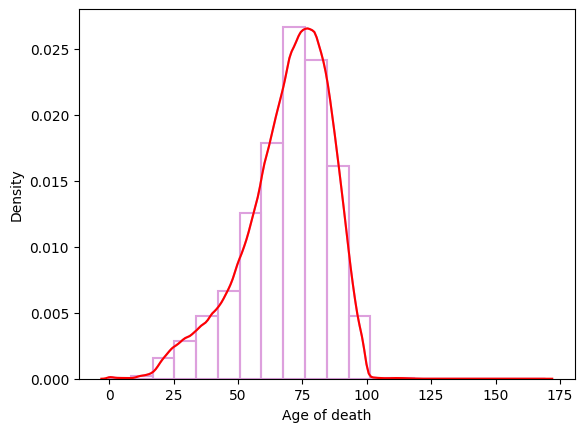

In [87]:
sb.histplot(df['Age of death'], color='plum', bins=20,\
            fill=False, kde=True, stat='density')
sb.kdeplot(df['Age of death'], color='red');

**BINNING**

In [88]:
labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',\
        '70-80', '80-90', '90-100']
bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age category'] = pd.cut(df['Age of death'], bins=bins, labels=labels)

In [89]:
age_cat = df['age category'].value_counts().sort_index()
age_cat

0-10         737
10-20       6063
20-30      29653
30-40      48670
40-50      81196
50-60     150271
60-70     250512
70-80     319297
80-90     256475
90-100     78722
Name: age category, dtype: int64

*Visualizing the binned ages.*

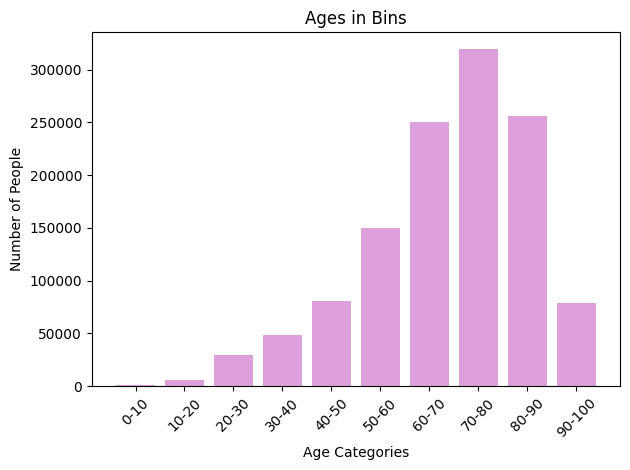

In [90]:
pt.bar(age_cat.index, age_cat.values, color='plum')
pt.xlabel('Age Categories')
pt.ylabel('Number of People')
pt.title('Ages in Bins')
pt.xticks(rotation=45)
pt.tight_layout();

In [91]:
df['Gender'].value_counts()

Male                                              981364
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Male                               2
Female; Female                                         1
Transgender Female; Intersex                           1
Transgender Female; Female                             1
Transgender Male; Male                                 1
Intersex; Transgender Male     

*Dropping every gender except for male and female.*

In [92]:
df = df[(df['Gender']=='Male') | (df['Gender']=='Female')]

In [93]:
df['Gender'].value_counts()

Male      981364
Female    107830
Name: Gender, dtype: int64

*Seeing the top 10 occupations.*

In [94]:
occ = df['Occupation'].value_counts()[:10]
occ

Artist                252094
Politician            176738
Athlete               106429
Researcher             81735
Military personnel     47226
Religious figure       34089
Businessperson         17085
Architect              15716
Journalist             13997
Teacher                13390
Name: Occupation, dtype: int64

*Keeping the top 10 occupations.*

In [95]:
df = df.loc[df['Occupation'].isin(occ.index)]

In [96]:
df['Occupation'].value_counts()

Artist                252094
Politician            176738
Athlete               106429
Researcher             81735
Military personnel     47226
Religious figure       34089
Businessperson         17085
Architect              15716
Journalist             13997
Teacher                13390
Name: Occupation, dtype: int64

*Preparing the contingency table for calculating chi$^2$.*

In [97]:
contingency_table = pd.crosstab(df['Gender'], df['Occupation'])
contingency_table

Occupation,Architect,Artist,Athlete,Businessperson,Journalist,Military personnel,Politician,Religious figure,Researcher,Teacher
Gender,,,,,,,,,,
Female,518,44934,3482,827,1678,802,7749,873,6501,1831
Male,15198,207160,102947,16258,12319,46424,168989,33216,75234,11559


**CHI$^2$**

In [98]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print(pd.DataFrame(expected, columns=occ.index))

         Artist    Politician       Athlete    Researcher  Military personnel  \
0   1433.711343   22997.58382   9709.115839   1558.600044         1276.893463   
1  14282.288657  229096.41618  96719.884161  15526.399956        12720.106537   

   Religious figure  Businessperson     Architect    Journalist       Teacher  
0       4308.249675    16123.140452   3109.810764   7456.375453   1221.519145  
1      42917.750325   160614.859548  30979.189236  74278.624547  12168.480855  


*Above, we can see a comparison between the observed and the expected table. Let us look at the critical value.*

In [99]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.2f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.95, critical=16.919, stat=38745.304


In [100]:
if abs(stat) >= critical:
 print('Gender and Occupation are not independent!')
else:
 print('Gender and Occupation are independent!')

Gender and Occupation are not independent!


*Observing if the there is a significant difference between male and female with respect to their age of death.*

**The T-test** (Part $1$)

In [101]:
male_death = df['Age of death'][df['Gender']=='Male']
female_death = df['Age of death'][df['Gender']=='Female']

In [102]:
print(f'number of female {len(female_death)}')
print(f'number of male {len(male_death)}')

number of female 69195
number of male 689304


In [103]:
male_death = male_death.to_list()

In [104]:
male_death = random.sample(male_death, 69195)

In [105]:
len(male_death) == len(female_death)

True

In [106]:
print(np.var(male_death))
print(np.var(female_death))

245.8869000015931
294.77979679739735


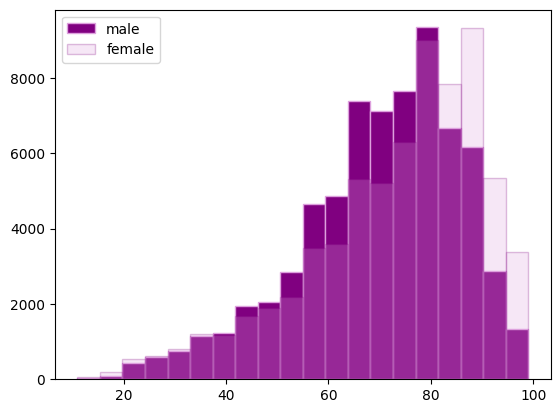

In [107]:
pt.hist(male_death, color='purple', label='male', edgecolor='plum', bins=20)
pt.hist(female_death, color='plum', label='female', alpha=0.25,\
        edgecolor='purple', bins=20)
pt.legend();

In [108]:
# Perform an independent t-test
t_statistic, p_value = ttest_ind(male_death, female_death)
# Define significance level
alpha = 0.05
# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis:\
    There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis:\
    There is no significant difference between the groups.")

t-statistic: -34.7320956218619
p-value: 3.540867632939794e-263
Reject the null hypothesis:    There is a significant difference between the groups.


**Covariance**

In [109]:
covariance = df['Birth year'].cov(df['Death year']) #between the numeric columns
covariance

18228.283106712865

*In our case, a correlation is more meaningful.*

In [110]:
corr = df.corr()
corr

,Birth year,Death year,Age of death
Birth year,1.000000,0.993426,0.145366
Death year,0.993426,1.000000,0.257669
Age of death,0.145366,0.257669,1.000000


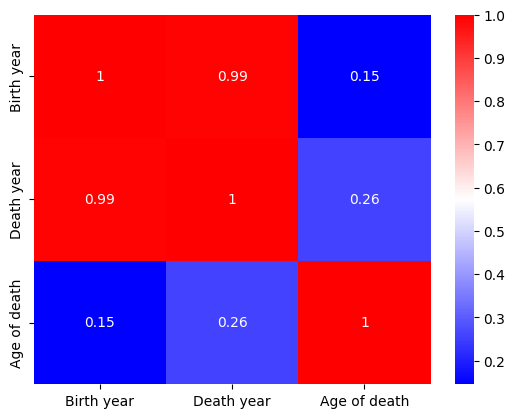

In [111]:
sb.heatmap(corr, cmap='bwr', annot=True);

**Encoding**

In [112]:
df['Occupation'].value_counts()

Artist                252094
Politician            176738
Athlete               106429
Researcher             81735
Military personnel     47226
Religious figure       34089
Businessperson         17085
Architect              15716
Journalist             13997
Teacher                13390
Name: Occupation, dtype: int64

In [113]:
hotdf = pd.get_dummies(df, columns=['Occupation','Gender'])

In [114]:
hotdf.head()

,Name,Country,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy,age category,Occupation_Architect,...,Occupation_Athlete,Occupation_Businessperson,Occupation_Journalist,Occupation_Military personnel,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher,Gender_Female,Gender_Male
0,George Washington,United States of America; Kingdom of Great Bri...,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[81.3, 78.5]",60-70,0,...,0,0,0,0,1,0,0,0,0,1
1,Douglas Adams,United Kingdom,1952,2001.0,natural causes,49.0,['United Kingdom'],[81.3],40-50,0,...,0,0,0,0,0,0,0,0,0,1
2,Abraham Lincoln,United States of America,1809,1865.0,homicide,56.0,['United States'],[78.5],50-60,0,...,0,0,0,0,1,0,0,0,0,1
3,Wolfgang Amadeus Mozart,Archduchy of Austria; Archbishopric of Salzburg,1756,1791.0,NaN,35.0,['Austria'],[81.6],30-40,0,...,0,0,0,0,0,0,0,0,0,1
4,Ludwig van Beethoven,Holy Roman Empire; Austrian Empire,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[81.6, 82.9]",50-60,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
np.min(hotdf['Birth year'])

-1800

In [116]:
hotdf[hotdf['Birth year']<0]

,Name,Country,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy,age category,Occupation_Architect,...,Occupation_Athlete,Occupation_Businessperson,Occupation_Journalist,Occupation_Military personnel,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher,Gender_Female,Gender_Male
68,Plato,Classical Athens,-427,-347.0,NaN,80.0,NaN,NaN,70-80,0,...,0,0,0,0,0,0,0,0,0,1
320,Confucius,Lu,-552,-479.0,natural causes,73.0,NaN,NaN,70-80,0,...,0,0,0,0,0,0,0,0,0,1
512,Ziying,NaN,-300,-206.0,NaN,94.0,NaN,NaN,90-100,0,...,0,0,0,0,1,0,0,0,0,1
516,Emperor Wen of Han,Western Han Dynasty,-202,-157.0,NaN,45.0,NaN,NaN,40-50,0,...,0,0,0,0,0,0,0,0,0,1
518,Emperor Wu of Han,Western Han Dynasty,-156,-87.0,NaN,69.0,NaN,NaN,60-70,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714594,Lucius Cluentius,NaN,-150,-89.0,NaN,61.0,NaN,NaN,60-70,0,...,0,0,0,1,0,0,0,0,0,1
774904,Chen Xi,Western Han Dynasty,-250,-194.0,NaN,56.0,NaN,NaN,50-60,0,...,0,0,0,0,1,0,0,0,0,1
777077,Marcus Aemilius Scaurus,NaN,-150,-101.0,NaN,49.0,NaN,NaN,40-50,0,...,0,0,0,1,0,0,0,0,0,1
778774,Darius,NaN,-500,-465.0,NaN,35.0,NaN,NaN,30-40,0,...,0,0,0,0,1,0,0,0,0,1


Such a dataset is meaningless. Let us take only those rows where the birth year is greater than or equal to 1200.

In [117]:
hotdf = hotdf[hotdf['Birth year']>=1200]
hotdf

,Name,Country,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy,age category,Occupation_Architect,...,Occupation_Athlete,Occupation_Businessperson,Occupation_Journalist,Occupation_Military personnel,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher,Gender_Female,Gender_Male
0,George Washington,United States of America; Kingdom of Great Bri...,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[81.3, 78.5]",60-70,0,...,0,0,0,0,1,0,0,0,0,1
1,Douglas Adams,United Kingdom,1952,2001.0,natural causes,49.0,['United Kingdom'],[81.3],40-50,0,...,0,0,0,0,0,0,0,0,0,1
2,Abraham Lincoln,United States of America,1809,1865.0,homicide,56.0,['United States'],[78.5],50-60,0,...,0,0,0,0,1,0,0,0,0,1
3,Wolfgang Amadeus Mozart,Archduchy of Austria; Archbishopric of Salzburg,1756,1791.0,NaN,35.0,['Austria'],[81.6],30-40,0,...,0,0,0,0,0,0,0,0,0,1
4,Ludwig van Beethoven,Holy Roman Empire; Austrian Empire,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[81.6, 82.9]",50-60,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222990,Karl Holzer,Austria-Hungary,1855,1918.0,NaN,63.0,"['Austria', 'Hungary']","[81.6, 75.8]",60-70,1,...,0,0,0,0,0,0,0,0,0,1
1222992,Wim de Vreng,Kingdom of the Netherlands,1930,1980.0,NaN,50.0,['Netherlands'],[81.8],40-50,0,...,1,0,0,0,0,0,0,0,0,1
1222996,Else Preussner,NaN,1889,1954.0,NaN,65.0,NaN,NaN,60-70,0,...,0,0,0,0,0,0,0,0,1,0
1223007,Reginald Oswald Pearson,United Kingdom,1887,1915.0,NaN,28.0,['United Kingdom'],[81.3],20-30,0,...,0,0,0,0,0,0,0,0,0,1


We will take the top 7 manner of death.

In [124]:
death = hotdf['Manner of death'].value_counts()[:7]
death

natural causes        28101
suicide                4000
accident               3781
homicide               2692
capital punishment     1366
unnatural death         243
death in battle         160
Name: Manner of death, dtype: int64

In [128]:
hotdf = hotdf.loc[hotdf['Manner of death'].isin(death.index)]
hotdf

,Name,Country,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy,age category,Occupation_Architect,...,Occupation_Athlete,Occupation_Businessperson,Occupation_Journalist,Occupation_Military personnel,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher,Gender_Female,Gender_Male
0,George Washington,United States of America; Kingdom of Great Bri...,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[81.3, 78.5]",60-70,0,...,0,0,0,0,1,0,0,0,0,1
1,Douglas Adams,United Kingdom,1952,2001.0,natural causes,49.0,['United Kingdom'],[81.3],40-50,0,...,0,0,0,0,0,0,0,0,0,1
2,Abraham Lincoln,United States of America,1809,1865.0,homicide,56.0,['United States'],[78.5],50-60,0,...,0,0,0,0,1,0,0,0,0,1
7,Claude Monet,France,1840,1926.0,natural causes,86.0,['France'],[82.5],80-90,0,...,0,0,0,0,0,0,0,0,0,1
10,Elvis Presley,United States of America,1935,1977.0,natural causes,42.0,['United States'],[78.5],40-50,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214539,Michael Benveniste,United States of America,1946,1982.0,suicide,36.0,['United States'],[78.5],30-40,0,...,0,0,0,0,0,0,0,0,0,1
1215398,George Dewey Sanford Jr.,United States of America,1925,1994.0,suicide,69.0,['United States'],[78.5],60-70,0,...,0,0,0,1,0,0,0,0,0,1
1217919,Antonín Gruncl,Czechoslovakia,1905,1942.0,capital punishment,37.0,['Slovakia'],[77.2],30-40,0,...,0,0,0,0,0,0,0,0,0,1
1221308,Sara Champion,United Kingdom,1946,2000.0,natural causes,54.0,['United Kingdom'],[81.3],50-60,0,...,0,0,0,0,0,0,1,0,1,0


And the top 22 countries they are from.

In [134]:
countries = hotdf['Associated Countries'].value_counts()[:22]
countries

['United States']     14330
['United Kingdom']     3794
['France']             2124
['Germany']            1510
['Canada']             1113
['Russia']             1029
['Italy']               823
['Japan']               780
['Australia']           737
['Spain']               653
['Poland']              403
['Brazil']              371
['Mexico']              362
['Netherlands']         352
['Argentina']           332
['China']               302
['Sweden']              285
['Austria']             283
['Hungary']             275
['Norway']              246
['Belgium']             230
['New Zealand']         229
Name: Associated Countries, dtype: int64

In [138]:
hotdf = hotdf.loc[hotdf['Associated Countries'].isin(countries.index)]
hotdf.head()

,Name,Country,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy,age category,Occupation_Architect,...,Occupation_Athlete,Occupation_Businessperson,Occupation_Journalist,Occupation_Military personnel,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher,Gender_Female,Gender_Male
1,Douglas Adams,United Kingdom,1952,2001.0,natural causes,49.0,['United Kingdom'],[81.3],40-50,0,...,0,0,0,0,0,0,0,0,0,1
2,Abraham Lincoln,United States of America,1809,1865.0,homicide,56.0,['United States'],[78.5],50-60,0,...,0,0,0,0,1,0,0,0,0,1
7,Claude Monet,France,1840,1926.0,natural causes,86.0,['France'],[82.5],80-90,0,...,0,0,0,0,0,0,0,0,0,1
10,Elvis Presley,United States of America,1935,1977.0,natural causes,42.0,['United States'],[78.5],40-50,0,...,0,0,0,0,0,0,0,0,0,1
20,Linda Lovelace,United States of America,1949,2002.0,accident,53.0,['United States'],[78.5],50-60,0,...,0,0,0,0,0,0,0,0,1,0


Dropping Associated Countries since we already have a Country column.

In [142]:
hotdf.drop(['Associated Countries'], inplace=True, axis=1)

The values in the Associated Country Life Expectancy column look like *almost* integers with those extra nasty brackets.

In [143]:
hotdf['Associated Country Life Expectancy']

dtype('O')

Let us convert this to integers.

In [148]:
hotdf['Associated Country Life Expectancy'] = hotdf['Associated Country Life Expectancy']\
.apply(lambda x: float(x.strip('[]')))
hotdf.head()

,Name,Country,Birth year,Death year,Manner of death,Age of death,Associated Country Life Expectancy,age category,Occupation_Architect,Occupation_Artist,Occupation_Athlete,Occupation_Businessperson,Occupation_Journalist,Occupation_Military personnel,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher,Gender_Female,Gender_Male
1,Douglas Adams,United Kingdom,1952,2001.0,natural causes,49.0,81.3,40-50,0,1,0,0,0,0,0,0,0,0,0,1
2,Abraham Lincoln,United States of America,1809,1865.0,homicide,56.0,78.5,50-60,0,0,0,0,0,0,1,0,0,0,0,1
7,Claude Monet,France,1840,1926.0,natural causes,86.0,82.5,80-90,0,1,0,0,0,0,0,0,0,0,0,1
10,Elvis Presley,United States of America,1935,1977.0,natural causes,42.0,78.5,40-50,0,1,0,0,0,0,0,0,0,0,0,1
20,Linda Lovelace,United States of America,1949,2002.0,accident,53.0,78.5,50-60,0,1,0,0,0,0,0,0,0,0,1,0


**The T-Test** (Part $2$)

In [151]:
# Perform an independent t-test
t_statistic, p_value = ttest_ind(hotdf['Age of death'],\
                                 hotdf['Associated Country Life Expectancy'])
# Define significance level
alpha = 0.05
# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

t-statistic: -183.09426126580126
p-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


**Checking Correlation**

In [152]:
corr = hotdf['Age of death'].corr(hotdf['Associated Country Life Expectancy'])
corr

-0.037945278353746045

*Quick Inference*

Interestingly, there exists a weak negative correlation between Age of death and Associated Country Life Expectancy from this dataset. This implies an inverse proportion. As life expectancy increases, age of death decreases and vice versa.